# BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [1]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc,'html.parser')

print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [2]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')
h1 = soup.html.body.h1
p1 = soup.html.body.p

# p2 = p1.next_sibling 하나는 공백
p2 = p1.next_sibling.next_sibling

print(h1.string)
print(p1.string)
print(p2.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


## find
find() : HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴


In [3]:
html = """
<html><body>
  <h1 id ='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
#find 첫번째 태그를 반환
soup = BeautifulSoup(html,'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

# 태그 하위의 문자열을 객체화한다. 문자열이 없으면 None을 반환
print(title.string)
print(body.string)

# 하위 자식태그의 텍스트까지 문자열로 반환
print(title.text)
print(body.text)

# html 문서의 모든 텍스트를 추출
print(body.get_text()) 

스크레이핑이란?
웹 페이지를 분석하는 것
스크레이핑이란?
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


## findAll
find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)


In [4]:
# findAll 조건에 해당되는 모든 태그를 리스트로 반환
# texts = soup.find_all('p') 도 동일

texts = soup.findAll('p')
# print(texts)

for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [6]:
req = requests.get('https://naver.com')
html = req.text
# print(html)

soup = BeautifulSoup(html,'html.parser')

result = soup.find_all('span',class_='blind') # class과 예약어라 겹쳐서 _추가로 붙여준다.
result

NameError: name 'requests' is not defined

In [7]:
result = soup.find_all('span',class_='blind')[0]
result

#result = soup.find_all('a','api_link')

IndexError: list index out of range

In [8]:
result = soup.find_all('span')
result

[]

In [9]:
result = soup.find_all('span',class_='fix')
result

[]

In [10]:
result = soup.find_all('span',attrs={'class':'fix'}) # class를 딕셔너리로 지정
result

[]

In [11]:
import re

req = requests.get('https://naver.com')
soup = BeautifulSoup(html,'html.parser')

# find_all
print(soup.find_all(string='네이버'))

# 정규식
print(soup.find_all(string=re.compile('네이버')))

NameError: name 'requests' is not defined

## select
select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시

In [12]:
import urllib.request as req

url = "https://finance.naver.com/marketindex/"

res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser')

price = soup.select_one('div.head_info > span.value').string

print('usd/krw =', price)

usd/krw = 1,312.50


In [13]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [14]:
!pip install lxml

In [15]:
from bs4 import BeautifulSoup

# 객체 생성
bs = BeautifulSoup(html_doc, 'html.parser') # lxml

# 정렬
print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [16]:
bs.title

<title>The Dormouse's story</title>

In [17]:
bs.title.name

'title'

In [18]:
bs.title.parent.name

'head'

In [19]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [20]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [21]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [22]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [23]:
bs.a['class']

['sister']

In [24]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [25]:
bs.find_all

<bound method Tag.find_all of <html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>>

In [26]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

## string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [27]:
bs.find_all

<bound method Tag.find_all of <html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>>

In [28]:
# string 스트링만 리스트로 추출함
# 줄바꿈, 공백 등 필요없는 것들을 제거한 스트링 리스트를 반환
print(bs.string)

None


In [29]:
# get_text 일반적으로 텍스트 부분만 모두 추출함
# 하나의 스트링을 만들어 반환
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [30]:
print(bs.find('div'))

<div></div>


In [31]:
# 문자열이 없으면 "None"을 반환
print(bs.find('div').string)

None


In [32]:
# 유니코드형식으로 텍스트까지 문자열로 반환하기 때문에 아무정보도 나오지 않는다.
print(bs.find('div').get_text())

In [33]:
print(bs.find('body').string)

None


In [34]:
# 하위태그에 텍스트까지 파상하려는 경우, get_text() 선호
print(bs.find('body').get_text())



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [35]:
# 정확한 선택자를 통한 파싱할 경우, string을 선호
bs.a.string

'Elsie'

In [36]:
li = bs.find_all('p')
li

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [37]:
# 문자열이 없으면 "None"을 반환
li = bs.find_all('p')
for i in li:
    print(i.string)

The Dormouse's story
None
...


In [38]:
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


## urllib + BeautifulSoup

In [39]:
# urlopen()과 BeautifulSoup의 조합

import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
import urllib.request as req

# url 선언
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

# request로 url에 대한 응답값을 가져온다
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')

# title 태그의 문자열을 반환
title = soup.find('title').string

# 'wf' 첫번째 정보만 반환
wf = soup.find('wf').string

print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [40]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')

wf = soup.find('wf').string

# wf에서 제외할 부분을 공백처리하여 wf에 저장하여 반환
wf = re.sub('[^0-9가-힣]',' ', wf)
wf

'   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다 '

#### 과제 0722
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.
(정규표현식 이용)

In [41]:
import re
result = re.sub(' +',' ',wf)
result

' 강수 30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다 기온 이번 예보기간 아침 기온은 22 26도 낮 기온은 29 34도로 어제 24일 아침최저기온 22 24도 낮최고기온 25 32도 보다 높겠습니다 주말전망 30일 토 은 전라권에 소나기가 오는 곳이 있겠고 31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다 아침 기온은 23 25도 낮 기온은 31 34도가 되겠습니다 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

In [42]:
texts = soup.find_all('wf')
# print(texts)

for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]',' ',t)
    print(t, '\n')

   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠습니다           기온  이번 예보기간 아침 기온은 22 26도  낮 기온은 29 34도로 어제 24일  아침최저기온 22 24도  낮최고기온 25 32도 보다 높겠습니다          주말전망  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  31일 일 은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23 25도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며  돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다  

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

맑음 

맑음 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

맑음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

맑음 

구름많음 

흐림 

흐림 

흐림 

흐림 

구름많음

In [43]:
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [44]:
bs.find('div').find('a').string

'메인 메뉴로 바로가기'

In [45]:
items = bs.find('div').find_all('a')
#items

for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스



강병원 이어 박용진도' 비명계 선제적 단일화' 제안
이재명, 호남 표심 잡기…비 이재명계 ‘단일화 논의’
박용진 "강병원 설훈 김민석, 컷오프 전 혁신 단일화 공동선언 제안"
민주 당권 주자 28일 ‘예비경선’…이재명 외 본선행 2명 ‘예측불허’
54개의 관련뉴스 더보기
남래진 선관위원 후보자 "중앙선관위, 편향 시비 없게 구성돼야"
국회, 남래진 중앙선관위원 청문경과보고서 채택
남래진, '아들 사적채용 논란' 강릉 선관위원에 "자진사퇴가 맞아"
대통령실 9급 부친, 강릉시 선거관리위원 사의…내일 수리 여부 결정
26개의 관련뉴스 더보기
李 "슈퍼리치 감세는 청개구리 정책"
이재명 "경제·민생 대책 거꾸로…한시적 공매도 금지해야"
거래소 찾은 이재명 "尹정부 청개구리 '경제·민생대책' 거꾸로…공매도 한시금지해야"
이재명 "尹정책, '빨간 청개구리'…한시적 공매도 금지 즉각 시행해야"
41개의 관련뉴스 더보기



유시민 "與 정치인 도파민 중독…마약 중독과 비슷한 상태"
 유시민 "尹정부 참 순수...여당은 도파민 중독 상태"[뉴스킹]
유시민 “文정부, 하고싶은 것 마음대로 못해...尹정부는 무신정권”
유시민 "여당은 '도파민' 중독 상태…윤 정부는 '무신정권' 같아"
13개의 관련뉴스 더보기


동영상기사

통일부, 국회에 북한인권재단 이사 추천 요청



통일부 "국회에 북한인권재단 이사 추천 요청"
14개의 관련뉴스 더보기



경찰 출신 與의원들 "경찰 집단행동, 복무규정 위반"



與 경찰출신 의원들 "경찰은 공권력…집단행동 참으로 우려"
8개의 관련뉴스 더보기



박진 외교 "文정부 

#### 과제 0725

상기 출력물 불필요한 공백없이 정렬하여 출력하세요.

In [4]:
import re
from bs4 import BeautifulSoup
import urllib.request as req

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

items = bs.find('div').find_all('a')

li=[]
for i in items:
    li.append(i.get_text())
    
a = ' '.join(li)
a
re.sub('[\'\n]','',a)
#re.sub('[\W]','',a)
#re.sub('\s{2,}','',wf)

'메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별  정치 선택됨 경제  사회  생활/문화  IT/과학  세계  랭킹  신문보기  오피니언  TV  팩트체크  전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실  국회/정당  북한  행정  국방/외교  정치일반    안내헤드라인 뉴스  권영세 “탈북 어민, 흉악범이라 북송해야 한다는 건 전체주의적 사고” 권영세 “흉악범 북송? 그런 논리면 삼청교육대도 긍정”…野 반발 권영세 “탈북민 의사 반한 북송, 2019년 ‘어민북송’이 유일” 권영세 "탈북어민 북송은 잘못된 결정…사례 더 있는지 검토" 29개의 관련뉴스 더보기 조코위 인니 대통령, 현대차연구소 28일 방문 조코위 인니 대통령 27일 방한…"尹정부, 아세안 외교 본격 시작"(상보) 조코위 인니 대통령 방한…현대차 연구소 간다 대통령실 "인니 대통령 방한, 尹정부 아세안 외교 시작 신호탄" 35개의 관련뉴스 더보기  尹 “여가부 폐지 로드맵 서둘러라” 尹 "여가부 폐지 로드맵 필요"...성범죄 피해 男 보호시설 설치 윤 대통령, 업무보고 받고 "여가부 폐지 로드맵 마련" 지시 여가부 마지막 업무보고? 尹 “조속히 폐지 로드맵 만들라”(종합) 93개의 관련뉴스 더보기 동영상기사 여야도 전면전‥"직무유기"vs"경찰 장악" 尹 "행안부·경찰청에서 필요한 조치"...野 "장악 시도" 총공세 경찰국 신설 놓고 여야 공방 격화 여야 총경회의 놓고 강대강 대치 이어가 16개의 관련뉴스 더보기  한동훈 "의원님 장관 때 檢총장 패싱" 박범계 "택도 없다" 동영상기사 박범계, 한동훈과 격돌…"인사검증 법치농단" vs "문제 없다" 92개의 관련뉴스 더보기  윤 대통령 취임식 VIP석에 ‘도이치 주가조작’ 권오수 아들 있었다  민주 “‘주가 조작 의혹’ 권오수 아들, 대통령 취임식 참석…이유 수상해” 25개의 관련뉴스 더보기  설훈, ‘당권경쟁’ 이재명에 “여러가지 도덕적 문제점 바탕에 깔려” 지

In [46]:
import urllib.request as rq

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
text = bs.find('div')
text = text.get_text()
text

'\n\n\n\n\n\n메인 메뉴로 바로가기\n본문으로 바로가기\n\n\n\n\n\n\n\n\n\n\n검색\n\n\n\n\nNAVER\n뉴스\n\n\nTV연예\n스포츠\n날씨\n프리미엄\n\n\n\n\n\n\n\n\n\n\n언론사별 \n정치 선택됨\n경제 \n사회 \n생활/문화 \nIT/과학 \n세계 \n랭킹 \n신문보기 \n오피니언 \nTV \n팩트체크 \n\n\n\n\n\n\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n\n\n\n07.25(월)\n\n전체 언론사\n뉴스스탠드\n라이브러리\n\n\n\n\n\n기사목록\n\n\n\n\n\n\n\n\n정치\n\n대통령실 \n국회/정당 \n북한 \n행정 \n국방/외교 \n정치일반 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n안내헤드라인 뉴스\n\n\n                            헤드라인 뉴스와 각 기사묶음 타이틀은  기사 내용을 기반으로 자동 추출됩니다.\n                        \n\n닫기\n\n\n\n\n\n\n\n\n\n\n李 "슈퍼리치 감세는 청개구리 정책"\n더불어민주당 유력 당권주자인 이재명 의원은 25일 윤석열 정부의 세제 개편안에 대해 “위기를 기회로 양극화를 더욱 심화시키는 ‘빨간 청개구리’ 같은 정책”이라고 혹평했다. 이 의원은 이날 서울 여의도 한국거 …\n\n한국경제\n\n\n\n\n\n\n경향신문\n\n이재명 “윤석열 정부 경제대책, 빨간 청개구리 같아”\n\n\n\n\n\nMBN\n\n이재명 "윤석열 정부 경제정책 거꾸로…공매도 한시 금지해야"\n\n\n\n\n\n국민일보\n\n이재명 “尹정부 경제대책, 거꾸로 가…빨간 청개구리”\n\n\n\n\n\n\n41개의 관련뉴스 더보기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n한동훈 "검찰총장 패싱 인사? 전 정부도 완전히 \'패싱\' 인사 했잖나"\n전현직 법무장관, \'인사 검증\'·\'검찰 인사\' 격돌 윤석열 정부의 첫 법무부 장관인 한동훈 장관과 문재인 정부

In [47]:
text1 = re.sub('[^\w+]',' ',text)

text1 = re.sub(' +',' ',text1)
text1

' 메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 07 25 월 전체 언론사 뉴스스탠드 라이브러리 기사목록 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 헤드라인 뉴스와 각 기사묶음 타이틀은 기사 내용을 기반으로 자동 추출됩니다 닫기 李 슈퍼리치 감세는 청개구리 정책 더불어민주당 유력 당권주자인 이재명 의원은 25일 윤석열 정부의 세제 개편안에 대해 위기를 기회로 양극화를 더욱 심화시키는 빨간 청개구리 같은 정책 이라고 혹평했다 이 의원은 이날 서울 여의도 한국거 한국경제 경향신문 이재명 윤석열 정부 경제대책 빨간 청개구리 같아 MBN 이재명 윤석열 정부 경제정책 거꾸로 공매도 한시 금지해야 국민일보 이재명 尹정부 경제대책 거꾸로 가 빨간 청개구리 41개의 관련뉴스 더보기 한동훈 검찰총장 패싱 인사 전 정부도 완전히 패싱 인사 했잖나 전현직 법무장관 인사 검증 검찰 인사 격돌 윤석열 정부의 첫 법무부 장관인 한동훈 장관과 문재인 정부의 마지막 법무부 장관을 지냈던 프레시안 한국일보 檢인사 한동훈이 다해 vs 박범계는 총장 패싱 前 現 법무장관 국회 격돌 SBS 박범계 왕중왕 1인지배 vs 한동훈 박 장관 때 검찰인사 패싱 이데일리 한동훈 박범계 인사정보단 설전 1인지배 vs 민정수석실은 55개의 관련뉴스 더보기 대통령실 담대한 계획 美 등과 충분한 협의 담으려 노력 중 대통령실은 북한이 국제사회 대북 제재와 코로나19 확산 등에 따른 어려움이 가중하는 상황인 것으로 판단했습니다 대통령실 핵심 관계자는 오늘 25일 오 SBS YTN 안보실 北 여러 어려움 가중 아사자 놀랍지 않아 뉴스1 국가안보실 北 코로나로 고통 추가 아사자 발생 놀랍지 않아 뉴시스 안보실 北 아사 놀라운 일 아냐 담대한 계획 은 경제 안보 패키지 8개의 관련뉴스 더보기 단독 反이재명 민주 97

In [48]:
texts = bs.find_all('p')
texts

[<p class="airs_info_inner"><i class="airs_info_icon_airs">AiRS</i><span class="airs_info_text"><b>추천</b>으로 구성된 뉴스를 제공합니다.</span></p>,
 <p class="section_sub_txt">오후 4시~오후 5시까지 집계한 결과입니다.</p>,
 <p class="copyright">본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.</p>]

In [49]:
items = bs.find('div',id='header').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [50]:
texts = bs.find_all('p')
for t in texts:
    #print(t.string)
    print(t.get_text())

AiRS추천으로 구성된 뉴스를 제공합니다.
오후 4시~오후 5시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [51]:
import urllib.request as rq

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
#bs

text = bs.get_text()

regrex = re.compile('[가-힣]+',text)
result = regrex.findall(text)
result

TypeError: unsupported operand type(s) for &: 'str' and 'int'

In [52]:
import urllib.request as rq

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')
bs = str(bs)

regrex = re.findall('[가-힣]+',bs)
result = ' '.join(result)
result

'  강 수   3 0 일   토   은   전 라 권 에   소 나 기 가   오 는   곳 이   있 겠 습 니 다   기 온   이 번   예 보 기 간   아 침   기 온 은   2 2   2 6 도   낮   기 온 은   2 9   3 4 도 로   어 제   2 4 일   아 침 최 저 기 온   2 2   2 4 도   낮 최 고 기 온   2 5   3 2 도   보 다   높 겠 습 니 다   주 말 전 망   3 0 일   토   은   전 라 권 에   소 나 기 가   오 는   곳 이   있 겠 고   3 1 일   일   은   중 부 지 방 은   대 체 로   맑 겠 으 며   남 부 지 방 과   제 주 도 는   구 름 많 겠 습 니 다   아 침   기 온 은   2 3   2 5 도   낮   기 온 은   3 1   3 4 도 가   되 겠 습 니 다   이 번   예 보 기 간   동 안   우 리 나 라   주 변   기 압 계 에   따 라   소 나 기 가   내 리 는   구 역 이   변 동 될   수   있 으 며   돌 풍 과   함 께   천 둥   번 개 를   동 반 한   강 한   소 나 기 가   내 리 는   곳 이   있 겠 으 니   안 전 에   유 의 하 기   바 라 며   앞 으 로   발 표 되 는   기 상 정 보 를   참 고 하 기   바 랍 니 다  '

In [53]:
import urllib.request as rq
import re
url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs = bs.text
# bs
p = re.sub('[^가-힣]',' ',bs)
p = re.sub('\s{2,}',' ',p)
p

' 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 속보 김현숙 장관에 여가부 폐지 로드맵 조속히 마련 대전일보 윤석열 대통령 여가부 폐지 로드맵 조속 마련 지시 세계일보 내용작성전 윤 대통령 여가부 폐지 로드맵 조속 마련 지시 경향신문 윤 대통령 여가부 폐지 로드맵 조속마련 지시 서울신문 윤 대통령 여가부 폐지 로드맵 조속 마련 지시 한국일보 내용작성전 속보 닫기 월 일 구독 동영상 재생시간 고물가에 지갑 못 열어 유행하는 무지출 챌린지 기자도 해봤다 출근은 공공자전거 따릉이로 점심은 냉장고에 남은 재료들로 도시락 싸기 커피는 집에 굴러다니는 쿠폰으로 해결 간식은 회사 탕비실에서 외식물가가 일 년 만에 넘게 오르면서 젊은 직장인들이 하루에 한 푼도 강원도민일보 월 일 구독 권성동 경찰의 집단행동 본질은 항명을 모의하는 경찰판 하나회 국민의힘 권성동 당 대표 직무대행 겸 원내대표가 전국 경찰서장 모임을 경찰판 하나회 라고 규정하며 강력 비판했다 권 대행은 일 자신의 페이스욱을 통해 경찰의 집단행동이 한계를 넘었다 지난 일 전국 경찰 국제신문 월 일 구독 윤 대통령 여가부 폐지 로드맵 조속히 마련 지시 윤석열 대통령이 일 여성가족부 폐지 로드맵을 조속히 마련하라고 김현숙 여가부 장관에게 지시했다 윤 대통령은 이날 오후 김 장관으로부터 부처 업무보고를 받은 뒤 여가부 업무를 총체적으로 검토해 여가부 폐지 로드 월 일 구독 포착 년 된 안내문 옷장엔 곰팡이 군 간부가 폭로한 숙소 모습 충남 계룡대에서 근무했던 군 초급 간부가 열악한 간부 숙소 실태를 폭로하며 개선을 촉구했습니다 어제 일 페이스북 커뮤니티 육군훈련소 대신 전해드립니다 육대전 에는 년이 지난 숙소 안내문 이라는 제목의 디지털데일리 월 일 구독 퇴근길 오징어게임에 우영우까지 넷플릭스 한국 없으면 못살아 

In [54]:
import urllib.request as rq
import re

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
texts = bs.find_all('p')
for t in texts:
    #print(t.string,'\n')-> None 발견
    print(t.get_text(),'\n')

국민의힘 이준석 대표에게 성상납을 한 의혹으로 경찰 조사를 받는 김성진(구속 수감) 아이카이스트 대표가 변호인을 강신업 변호사로 교체했다. 25일 김 대표 측에 따르면 김 대표의 변호를 맡아온 김소연 변호사가 최근  

한국사회에서 함께 살아가고 있지만 차별과 배제를 일상적으로 겪는 이주민 2세대가 있다. 본인 또는 부모가 외국으로부터 이주한 경험이 있는 ‘이주배경 청년’이다. 여기서 ‘이주’란 중국, 베트남, 몽골, 러시아 등 외 

2016년 언론 사상 최대 규모의 조세도피처 데이터가 유출됐다. 국제탐사보도언론인협회(ICIJ) 주관으로 전 세계 400여 명의 기자가 국제협업 취재팀을 꾸렸다. 파나마 페이퍼스 프로젝트다. 당시 파나마 로펌 모색  

대전지역 노동계와 관련단체 등이 25일 대전고용노동청에 경비 노동자들을 위한 폭염 대책 마련을 촉구하고 나섰다. 이들은 아파트 경비실 에어컨 실태 조사와 특별근로감독을 실시할 것을 요구했다. 대전지역 15개 단체와  

KBS 양대 노조가 'KBS 수신료 폐지론'를 언급한 국민의힘을 향해 규탄 성명을 발표했다. 국민의힘 미디어특별위원회는 지난 24일 <프랑스 공영방송 수신료 폐지 하원 통과에 부쳐> 제하의 성명에서 현재 전기요금에  

1000원 미만 초저가 마트 즉석밥도 인기 퇴근하고 집에 와서 배가 고픈데 밥솥에 밥이 똑 떨어졌을 때 부엌 ‘상비군’ 즉석밥을 찾는 사람이 적잖을 것이다. 코로나19에 감염돼 집에서 자가격리를 해야 했을 때도 즉석 

일론 머스크 테슬라 최고경영자(CEO)가 친구인 세르게이 브린 구글 공동창업자의 아내와의 불륜설에 대해 "말도 안 되는 헛소리"라고 반박했다. 머스크는 24일(현지시간) 트위터에 글을 올려 "브린과 나는 친구이며,  

미국에서 가장 큰 산불이 요세미티 국립공원 근처에까지 급속도로 번지면서 캘리포니아주 일부에서 비상사태가 선포됐다. 24일(현지시간) BBC에 따르면 지난 주 금요일 시작된 산불이 삽시간에 확산하면서 소방관들이 진화를 

'피겨 여왕' 김연아(32)와

## requests + BeautifulSoup

In [55]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com'
r = rq.get(url)

html = r.text
bs = BeautifulSoup(html, 'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

#### 과제 0725
기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거한 후 출력하세요.

In [5]:
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
import urllib.request as req

url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=105'

res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')

wf = soup.find('wf').get_text()
#wf

wf = re.sub('[^가-힣0-9()~.,m]',' ',wf)
re.sub('\s{2,}','',wf)

'(하늘상태) 이번 예보기간에는 흐린 날이 많겠습니다.(기온) 이번 예보기간 아침 기온은 19~26도, 낮 기온은 26~33도로 어제(25일, 아침최저기온 19~23도, 낮최고기온 25~34도)와 비슷하겠습니다.(해상) 동해중부해상의 물결은 0.5~2.0m로 일겠습니다.(주말전망) 30일(토)~31일(일)은 가끔 구름많겠습니다. 아침 기온은 19~25도, 낮 기온은 27~33도가 되겠습니다.이번 예보기간 동안 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

#### 과제 0725
Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [ ]:
import urllib.request as rq
import re

url = 'http://www.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

text = bs.find_all('span')
text = str(text)
text

p = re.sub('[^가-힣]',' ',text)
p = re.sub(' +',' ',p)
p

In [57]:
import urllib.request as rq
import re

url = 'http://www.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

text = bs.find_all('span')
text = str(text)
text

p = re.sub('[^가-힣]',' ',text)
p = re.sub(' +',' ',p)
p

' 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 클래스를 추가해주세요 삭제 설정이 초기화 된다면 도움말 을 확인해주세요 설정이 초기화 된다면 도움말 을 확인해주세요 도움말 도움말 클래스를 추가해주세요 자동저장 끄기 클래스를 추가해주세요 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 날씨별 맑음 낮 맑음 밤 구름조금 낮 구름조금 밤 구름많음 낮 구름많음 밤 흐림 약한비 비 강한비 약한눈 눈 강한눈 진눈깨비 소나기 안개 소낙눈 번개뇌우 우박 황사 비또는눈 가끔비 가끔눈 가끔비또는눈 흐린후갬 뇌우후갬 비후갬 눈후갬 흐려져비 흐려져눈 날씨별 맑음 낮 맑음 밤 구름조금 낮 구름조금 밤 구름많음 낮 구름많음 밤 흐림 약한비 비 강한비 약한눈 눈 강한눈 진눈깨비 소나기 안개 소낙눈 번개뇌우 우박 황사 비또는눈 가끔비 가끔눈 가끔비또는눈 흐린후갬 뇌우후갬 비후갬 눈후갬 흐려져비 흐려져눈 바로가기 바로가기 추가 최근검색어 있으면 날짜 표시 추가 추가 클래스를 추가해주세요 클래스를 추가해주세요 자세히보기 도움말 신고 도움말 신고 클래스를 추가해주세요 자동완성 끄기 클래스를 추가해주세요 자동완성 끄기 쇼핑 쇼핑 최저기온 최고기온 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 아르마니 뷰티 아르마니 뷰티 네이버쇼핑 기획전 네이버쇼핑 기획전 주일 전 의율 의율 주일 전 횬블리 횬블리 개월 전 민됴 민됴 주일 전 메이쥬니 메이쥬니 재생 재생시간 재생시간 개월 전 디렉터파이 디렉터파이 재생 재생시간 재생시간 개월 전 디렉터파이 디렉터파이 재생 재생시간 재생시간 개월 전 디렉터파이 디

#### 과제 0725
Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 출력하세요.


In [58]:
import urllib.request as rq
import re

url = 'http://www.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

text = bs.find_all('span')
text = str(text)
text

'[<span>뉴스스탠드 바로가기</span>, <span>주제별캐스트 바로가기</span>, <span>타임스퀘어 바로가기</span>, <span>쇼핑캐스트 바로가기</span>, <span>로그인 바로가기</span>, <span class="_1syGnXOL _3VkgqBXB" data-clk="dropbanner1a" style="padding-right: 20px; font-size: 17px; color: black"><span>매일 쓰는 브라우저 보안이 걱정된다면, </span><strong>안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.</strong></span>, <span>매일 쓰는 브라우저 보안이 걱정된다면, </span>, <span style="background-color: #0436c7">다운로드</span>, <span class="blind">네이버</span>, <span class="blind">쥬니어네이버</span>, <span class="blind">해피빈</span>, <span class="blind">검색</span>, <span class="ico_search_submit"></span>, <span class="blind">한글 입력기</span>, <span class="ico_keyboard"></span>, <span class="blind">자동완성 레이어</span>, <span class="ico_arr"></span>, <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>, <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>, <span>@txt@</span>, <span class="etc">\n<em class="date">@date@.</em>\n<!-- [AU] _del 

In [59]:
import urllib.request as rq
import re

url = 'http://www.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

texts = bs.find_all('span')


result = []
for text in texts:
    result.append(text.get_text())
print(result)

['뉴스스탠드 바로가기', '주제별캐스트 바로가기', '타임스퀘어 바로가기', '쇼핑캐스트 바로가기', '로그인 바로가기', '매일 쓰는 브라우저 보안이 걱정된다면, 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.', '매일 쓰는 브라우저 보안이 걱정된다면, ', '다운로드', '네이버', '쥬니어네이버', '해피빈', '검색', '', '한글 입력기', '', '자동완성 레이어', '', '@txt@', '', '@txt@', '\n@date@.\n\n삭제\n', '설정이 초기화 된다면 도움말을 확인해주세요.', '설정이 초기화 된다면 도움말을 확인해주세요.', '\n도움말\n', '도움말', '\n\n\n자동저장 끄기\n\n', '\n\n자동저장 끄기\n', '', '@5@회차 당첨번호', '\n추첨 @13@.지급기한 1년\n', '추첨 @13@.', '지급기한 1년', '\n\n@6@@7@@8@@9@@10@@11@@12@\n\n', '\n@6@@7@@8@@9@@10@@11@@12@\n', '@14@', '@txt@@currency@', '@currency@', '\n@8@(@9@%)\n', '@8@(@9@%)', '\n@6@원\n', '@6@원', '', '@txt@', '\n@7@, @message@\n', '@7@, @message@', '\n\n\n@7@\n@8@°\n\n', '\n\n@7@\n@8@°\n', '@7@', '', '@txt@', '\n@5@\n', '@5@', '\n바로가기\n', '바로가기', '@txt@', '', '\n추가\n', '@txt@', '', '\n\n@date@.\n추가\n', '@query@ @intend@', '', '@intend@', '\n추가\n', '', '\n\n\n\n자세히보기\n', '', '\n도움말\n신고\n', '도움말', '신고', '\n\n\n자동완성 끄기\n\n', '\n\n자동완성 끄기\n', '쇼핑', '쇼핑LIVE', '23.0°', '33.0°', '이태원동', '이태원동', 

In [60]:
result = str(result)
p = re.sub('[^\w]',' ',result)
p = re.sub('[n]',' ',p)
p = re.sub(' +',' ',p)
p

' 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt curre cy curre cy 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query i te d i te d 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 23 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 671 개의 글 이전 다음 티빙 TVING 티빙 TVING 네이버 영화 네이버 영화 티빙 TVING 티빙 TVING 웨이브 wavve 웨이브 wavve 재생 재생시간1 35 재생시간 1분 전 홀인러브 Hole i Love Part1 홀인러브 Hole i Love Part1 재생 재생시간2 16 재생시간 1분 전 네이버 웹툰 네이버 웹툰 재생 재생시간0 53 재생시간 1분 전 네이버 웹툰 네이버 웹툰 재생 재생시간5 00 재생시간 17시간 전 돌싱글즈3 돌싱글즈3 재생 재생시간0 57 재생시간 1분 전 홀인러브 Hole i Love Part1 홀인러브 Hole i Love Part1 재생 재생시간5 27 재생시간 17시간 전 돌싱글즈3 돌싱글즈3 재생 재생시간4 40 재생시간 9시간 전 조선 

#### 과제 0725
Q. "http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.


In [61]:
import urllib.request as rq

url = "http://www.naver.com"
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

text = bs.find_all('a',id=True)
text

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="btn_keyboard" href="#" id="ke_kbd_btn" onclick="return false;" role="button"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>,
 <a aria-pressed="false" class="btn_arw _btn_arw fold" data-atcmp-element="" href="#" id="nautocomplete" role="button" tabindex="2"><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>,
 <a class="btn_set" data-clk="tca.like" href="#" id="NM_THEME_EDIT_SET" role="button">관심주제 설정</a>,
 <a class="content_top" href="#wrap" id="NM_scroll_top_btn"><span class="blind">TOP</span></a>]

In [62]:
result = []
for t in text:
    result.append(t.get_text())
print(result)

['다운로드', '네이버를 시작페이지로', '한글 입력기', '자동완성 레이어', '관심주제 설정', 'TOP']


In [63]:
result = ' '.join(result)
result

'다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP'

#### 과제 0725
url = 'https://news.naver.com/' 사이트 p태크에서 class가 cjs_ht인 데이터를 한글만을 불필요한 공백을 제거한 후 
출력하세요.


In [7]:
import urllib.request as rq
url = 'https://news.naver.com/'

html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

text = bs.find_all("p",{"class":"cjs_ht"})
text

[<p class="cjs_ht">
                         
                             
                                 오늘 언론사가 발행한<br/>종이신문에 실린 뉴스 1면<br/>기사가 제공됩니다.
                             
                             
                         
                     </p>]

In [8]:
text = str(text)
text =re.findall('[가-힣0-9]+',text)
text = ' '.join(text)
text

'오늘 언론사가 발행한 종이신문에 실린 뉴스 1면 기사가 제공됩니다'

### 예제

In [12]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://naver.com/'
html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

#print(bs.find('p'))

print(bs.find_all('p', limit=1),'\n')
print(bs.find_all('p', limit=2),'\n')
print(bs.find_all('p', limit=3))

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>]


In [ ]:
# 다음 뉴스 가져와보기

In [5]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')

title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text
title

'정치'

In [4]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html,'lxml')

title = bs.find('h2',id='mainContent').text
title


'정치'

In [ ]:
# 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요.

In [ ]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text

bs = BeautifulSoup(html,'lxml')
title = bs.select_one('#old_content > table > tbody > tr:nth-child(2) > td.title > div > a').text
title

In [26]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs = BeautifulSoup(html, 'lxml')

title = bs.find('div',attrs={"class":'tit3'}).text
#title
title[1:-1]

'외계+인 1부'

In [23]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text

bs = BeautifulSoup(html,'lxml')
title = bs.find_all('div',class_='tit3')
# for t in title:
#     print(t.text)
print(title[0].text)


외계+인 1부



#### 과제0726_1
네이버 영화 랭킹 가져와서 조회순 전체 영화제목을 출력하세요(출력방식 1위: 외계+인 1부)

In [160]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text

bs = BeautifulSoup(html,'lxml')
titles = bs.find_all('div',class_='tit3')

rank = 0
for title in titles:
    for i in range(1):
        rank += 1
    title = title.text
    print(f'{rank}위: {title}')


1위: 
외계+인 1부

2위: 
탑건: 매버릭

3위: 
한산: 용의 출현

4위: 
헤어질 결심

5위: 
범죄도시2

6위: 
그레이 맨

7위: 
토르: 러브 앤 썬더

8위: 
미니언즈2

9위: 
마녀(魔女) Part2. The Other One

10위: 
더 킬러: 죽어도 되는 아이

11위: 
비상선언

12위: 
엘비스

13위: 
명탐정 코난: 할로윈의 신부

14위: 
뒤틀린 집

15위: 
헌트

16위: 
썸머 필름을 타고!

17위: 
멘

18위: 
아이를 위한 아이

19위: 
브로커

20위: 
놉

21위: 
쥬라기 월드: 도미니언

22위: 
메모리

23위: 
닥터 스트레인지: 대혼돈의 멀티버스

24위: 
핸썸

25위: 
뽀로로 극장판 드래곤캐슬 대모험

26위: 
로스트 도터

27위: 
오싹한 동거

28위: 
니얼굴

29위: 
탑건

30위: 
임파서블 러브

31위: 
범죄도시

32위: 
굿 럭 투 유, 리오 그랜드

33위: 
큐어

34위: 
버즈 라이트이어

35위: 
군다

36위: 
스파이형 모델

37위: 
극장판 주술회전 0

38위: 
섹스 앤 퓨리

39위: 
명량

40위: 
VR 파이터

41위: 
불릿 트레인

42위: 
리미트

43위: 
마녀

44위: 
감동주의보

45위: 
특송

46위: 
귀멸의 칼날: 아사쿠사 편

47위: 
클라우스

48위: 
레지던트 이블: 라쿤시티

49위: 
아바타: 물의 길

50위: 
이상한 나라의 수학자



In [113]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""

import re
bs = BeautifulSoup(html,'html.parser')

# href에 슬래시(/)가 포함된 요소 찾기
li = bs.find_all(href=re.compile('https://'))

for e in li:

    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


In [ ]:
print(soup.find_all(class_=re.compile('d')))    # 해당 문자열이 포함된 요소를 찾는다
print(soup.find_all(id=re.compile('i')))
print(soup.find_all(re.compile('t')))           # 태그에 t가 포함된 요소 찾기
print(soup.find_all(re.compile('^t')))          # 태그 이름이 t로 시작하는 요소 찾기
print(soup.find_all(href=re.compile('/')))      # href에 슬래시(/)가 포함된 요소 찾기

## CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용

In [39]:
# 기사 리스트 가져오기
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')

lines = bs.select('body > div > main > section > div > div> ul > li > strong > a')
body = '\n'.join([line.text for line in lines])
print(body)

野 "두달만에 민주주의 통째로 부정"..'尹정부 경찰장악 규탄' 총공세
한 총리 "경찰국 신설, 경찰청 통솔 민주적으로 관장 하는 것"
[취재파일] 박진 외교장관 8월 방중..본격 시험대 오른 대중국 외교
민주당 "경찰국 설치 절차적 하자..尹, 경찰국가 만들려 해"
6·25 전쟁 교육자료, 유엔 참전국 교사들이 직접 만든다
정의, 경찰국 신설에 "與 우회 입법..野 원인 제공자" 비난
국제인권연맹∙NKDB, '북한 장애인 인권 실태' 지적 의견서 유엔 제출
尹의 업무보고 방식에 박지원 "세상에 그런 천재가 없어요" 힐난
2주째 잠행한 김정은..'전승절' 맞아 공식 석상 등장에 주목
정청래 "이재명 사법 리스크? 저쪽 프레임에 우리가 내부총질"


In [247]:
# 기사 제목 하나 가져오기
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')

line = bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
line.text

"핵실험 가능성 다시 솔솔..전승절 맞은 '김정은 메시지' 주목"

In [248]:
# Q. "2주 넘게 '두문불출' 김 여사..목요일 등장할까?" 제목의 기사 내용을 출력하세요. (불필요한 공백 및 요소 제거)

from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.v.daum.net/v/20220726105712920/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html,'lxml')

line = bs.select_one('#harmonyContainer > section')
article = line.text

# article = re.sub('\n','',article)
# article = re.sub(' +',' ',article)
# article

print(re.sub('\n{2,}','\n',article))


AttributeError: 'NoneType' object has no attribute 'text'

In [68]:
# 기사 본분 가져오기
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
soup = BeautifulSoup(html, 'lxml')

lines = soup.select('#harmonyContainer > section > p')

article = [line.text for line in lines]
article = ' '.join(article)
article

'■ "마드리드 이후 김건희 여사가 안 보인다" 윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다.  북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.  정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다.  장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다. ■ 공개행보 재개는? 목요일 진수식이 유력 그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다. 배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다.  김건희 여사가 진수식에 등장할지는 목요일 확인할 수

In [60]:
url = 'https://news.v.daum.net/v/20220726105712920/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
text = bs.find('section').find_all('p')
for t in text:
    t = t.get_text()
    t = re.sub('[^,.~(0-9가-힣)■]', ' ', t)
    t = re.sub('\s{2,}',' ', t )
    print(t)


■ 마드리드 이후 김건희 여사가 안 보인다 
윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 김건희 여사가 공개 행보를 중단했다 는 내용입니다. 
북대서양조약기구, 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.

 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 리스크 관리 에 들어간 것으로 보고 있습니다. 
장성철 공론센터 소장은 김건희 여사가 최근 2주간 사라졌다 면서 김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것 이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 경인양김도 가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 시사저널 에 출연한 진중권 전 교수는 지금 김건희 여사는 잘하고 있는 것 아니냐 는 사회자의 질문에 그렇다. 조금 더 기다려야 될 것 같다 고 조언하기도 했습니다.
■ 공개행보 재개는 목요일 진수식이 유력
그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다.
배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식( )에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배( )를 여성 대명사인 로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 
김건희 여사가 진수식에 등장할지는 목요일 확인할 수 있을 것 같습니다.
정승혜 기자 ( . . )


In [ ]:
# 크롤링) 접속 차단되었을때 User-Agent지정(header)
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375

headers = {'User-Agent' : '유저정보'}
url = '접속하고픈사이트'
requests.get(url, headers = headers)

In [ ]:
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

In [70]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}


url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
req = requests.get(url, headers = headers)
bs = BeautifulSoup(req.content,'html.parser')
print(bs)


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="사회 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=102" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="교육, 언론, 의료, 인물, 사건사고 등 사회 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="사회 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="t

In [75]:
target = bs.select_one('#main_content > div > div._persist > div:nth-child(1) > div:nth-child(5) > div.cluster_body > ul > li:nth-child(1) > div.cluster_text > a')
target.text

'농협 선거 때 돈 봉투 건넨 이사 ‘집행유예 2년’'

In [76]:
target

<a class="cluster_text_headline nclicks(cls_nav.clsart)" href="https://n.news.naver.com/mnews/article/056/0011308814?sid=102">농협 선거 때 돈 봉투 건넨 이사 ‘집행유예 2년’</a>

In [77]:
target['href']

'https://n.news.naver.com/mnews/article/056/0011308814?sid=102'

In [73]:
target = bs.select('#main_content > div > div > div > div > div > ul > li> div > a')
for element in target:
    print(element.text)
    print(element['href'])

청주공항 국제선 운항 재개…내일 베트남 달랏 전세기 이륙
https://n.news.naver.com/mnews/article/001/0013332772?sid=102
전국 7개 지방국제공항, 2년 5개월 만에 국제선 하늘길 열려
https://n.news.naver.com/mnews/article/032/0003162348?sid=102
"하늘길 모두 열렸다"…7개 지방 국제공항 국제선 전면 재개
https://n.news.naver.com/mnews/article/001/0013333975?sid=102
"해외 나가는 하늘길 모두 열려"…공사, 7개 지방 국제공항 국제선 전면 재개
https://n.news.naver.com/mnews/article/011/0004080304?sid=102
[현장영상] 25일 만에 다시 설치된 서울역 임시선별검사소
https://n.news.naver.com/mnews/article/277/0005123143?sid=102
인천시, 임시 선별검사소 3곳 2개월 만에 운영 재개
https://n.news.naver.com/mnews/article/056/0011308962?sid=102
임시선별검사소 12곳 운영 중..."이달 말 70곳으로 확대"
https://n.news.naver.com/mnews/article/052/0001768519?sid=102
백경란 질병청장, 임시선별검사소 현장점검…"운영시간 연장"
https://n.news.naver.com/mnews/article/001/0013333092?sid=102
이상민 '쿠데타' 발언에… 경찰 "마지막 자존심 건드려" 반발
https://n.news.naver.com/mnews/article/469/0000688073?sid=102
이상민 "경찰서장 회의는 쿠데타"…파출소 "우리도 뭉치자"
https://n.news.naver.com/mnews/article/015/0004728659?sid=102
이상민 "경찰서장회의, 하나회 12·12쿠데타와 다름없어" 강력 

In [87]:
# 이미지 추출

import requests as rq
from bs4 import BeautifulSoup
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://n.news.naver.com/mnews/article/005/0001542309?sid=102'
r = rq.get(url,headers=headers).text
bs = BeautifulSoup(r,'lxml')

target = bs.select_one('#img1')

print(target)
print('-'*100)
print(target['data-src'])

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/005/2022/07/26/2020053115464685306_1590907606_0017311767_20220726112702029.jpg?type=w647" id="img1"/>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/005/2022/07/26/2020053115464685306_1590907606_0017311767_20220726112702029.jpg?type=w647


Q. url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.
- 용도는 주요 키워드 분석을 위한 데이터셋 만들기
- 추후 wordcloud & 시각화 생각해서 데이터 가져오기

In [110]:
import requests as rq
from bs4 import BeautifulSoup
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://n.news.naver.com/mnews/article/662/0000004054?sid=100'
r = rq.get(url,headers=headers).text
bs = BeautifulSoup(r,'lxml')

lines = bs.select_one('#dic_area')

article = re.sub('[\n\t\xa0]','',article)
article = re.sub(' +',' ',article)
article

' 개량백신 도입·활용8월말 발표 행정안전부 내 경찰국신설 한덕수 국무총리(맨 오른쪽)가 26일 오전 정부서울청사에서 국무회의를 주재하고 있다. 연합뉴스 정부가 27일 ‘자율적인 거리두기 실천방안’을 발표한다. 코로나19 하루 신규 확진자가 10만명에 육박하는 데다 본격적인 휴가철이 시작되면서 감염 확산세가 빨라질 것으로 우려되면서다. 한덕수 국무총리는 26일 제33회 국무회의 모두발언에서 “내일(27일) 코로나19 중앙재난안전대책본부 회의에서 자율적인 거리두기 실천방안을 발표한다”고 밝혔다. 한 총리는 “코로나19 확진자수가 10만명에 육박했고 본격적인 휴가철이 시작됨에 따라 감염 확산 속도가 더 빨라지지 않을까 우려가 크다”며 이같이 말했다. 27일 0시 기준 신규 확진자수는 9만9327명으로 집계됐다. 한 총리는 “우리는 2년6개월간 여러 차례 유행기를 겪었으며 이제는 어떻게 대처해야 하는지 잘 알고 있다”면서 “중요한 것은 경제와 일상의 멈춤이 아니라 자율과 실천”이라고 말했다. 그는 이어 “개량백신을 하반기에 최대한 신속하게 도입해서 활용할 계획이며, 도입계획과 접종 대상 등 도입·활용 방향을 8월말에 발표하도록 하겠다”고 말했다. 한 총리는 폭염 장기화에 따른 국민 건강관리도 언급했다. 그는 “일찍 시작된 무더위가 장마가 마무리되면서 당분간 계속될 전망”이라면서 “폭염 장기화로 인한 국민 피해를 최소화할 수 있도록 관계부처는 지방자치단체와 합심해 국민의 건강과 안전 관리에 더욱 힘써주시기 바란다”고 말했다. 그러면서 “특히 독거노인·야외근로자 등 폭염 취약계층의 안전 확인에 각별히 신경 써주시고, 관련 지원 대책도 차질 없이 추진해달라”고 당부했다. 또한 “여름방학 기간 동안 가정형편 등으로 보호가 필요한 아동이 소외되지 않도록 돌봄 지원 체계도 강화해달라”고 주문했다. 행정안전부 내 경찰국을 신설하는 것과 관련해선 “오늘 국무회의가 처리할 안건에는 행안부와 그 소속기간 직제 일부 개정령안이 있다”면서 “이는 나날이 중요해지는 우리나라 치안기관인 경

In [104]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(article) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['개량', '백신', '도입', '활용', '발표', '행정안전부', '경찰', '신설', '한덕수', '국무총리', '오른쪽', '오전', '정부', '서울', '청사', '국무회의', '주재', '연합뉴스', '정부', '자율', '거리', '두기', '실천', '방안', '발표', '코로나', '하루', '신규', '진자', '육박', '본격', '휴가', '시작', '감염', '확산', '우려', '면서', '한덕수', '국무총리', '국무회의', '발언', '내일', '코로나', '중앙', '재난', '안전', '대책', '본부', '회의', '자율', '거리', '두기', '실천', '방안', '발표', '총리', '코로나', '진자', '수가', '육박', '본격', '휴가', '시작', '감염', '확산', '속도', '지지', '우려', '기준', '신규', '확진', '자수', '집계', '총리', '우리', '월간', '여러', '차례', '유행', '이제', '대처', '면서', '경제', '일상', '자율', '실천', '개량', '백신', '하반기', '최대한', '도입', '활용', '계획', '도입', '계획', '접종', '대상', '도입', '활용', '방향', '발표', '총리', '폭염', '장기', '국민', '건강', '관리', '언급', '일찍', '시작', '무더위', '장마', '마무리', '당분간', '계속', '전망', '폭염', '장기', '화로', '국민', '피해', '최소', '관계', '부처', '지방자치단체', '합심', '국민', '건강', '안전', '관리', '더욱', '독거', '노인', '야외', '근로자', '폭염', '취약', '계층', '안전', '확인', '신경', '관련', '지원', '대책', '차질', '추진', '당부', '또한', '여름방학', '기간', '동안', '가정', '형편', '보호', '아동', '소외', '지원', '체계', '강화', '주문', '행정안전부',

In [111]:
from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
rqs = requests.get(url,headers=headers).text
bs = BeautifulSoup(rqs,'lxml')
bs = bs.find_all('div',class_='cluster')
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid

[('경찰', 31),
 ('관련', 22),
 ('장관', 20),
 ('뉴스', 19),
 ('보기', 18),
 ('대통령', 15),
 ('의원', 14),
 ('한동훈', 13),
 ('정부', 12),
 ('민주당', 12),
 ('신설', 11),
 ('오늘', 10),
 ('반발', 9),
 ('행정안전부', 9),
 ('집단', 9),
 ('폐지', 9),
 ('문란', 8),
 ('이상민', 8),
 ('국민', 8),
 ('대표', 8),
 ('박범계', 7),
 ('일보', 7),
 ('업무', 7),
 ('행안부', 7),
 ('북송', 7),
 ('기강', 6),
 ('법무부', 6),
 ('중앙', 6),
 ('원내대표', 6),
 ('수신료', 6),
 ('강제', 6),
 ('박홍근', 6),
 ('평화', 6),
 ('기사', 5),
 ('국가', 5),
 ('윤석열', 5),
 ('여가부', 5),
 ('보고', 5),
 ('대통령실', 5),
 ('쿠데타', 5),
 ('사면', 5),
 ('행정', 5),
 ('한반도', 5),
 ('워치', 5),
 ('인사', 4),
 ('패싱', 4),
 ('국민일보', 4),
 ('로드맵', 4),
 ('마련', 4),
 ('비판', 4),
 ('울릉도', 4),
 ('이준석', 4),
 ('안철수', 4),
 ('김경수', 4),
 ('주장', 4),
 ('논란', 4),
 ('국무회의', 4),
 ('임종석', 4),
 ('강훈', 4),
 ('지지', 4),
 ('탈북', 4),
 ('어민', 4),
 ('유엔', 4),
 ('권영세', 4),
 ('승인', 4),
 ('이재명', 4),
 ('셀프', 4),
 ('헤드라인', 3),
 ('행동', 3),
 ('속보', 3),
 ('이후', 3),
 ('조속', 3),
 ('지시', 3),
 ('대응', 3),
 ('논의', 3),
 ('용산', 3),
 ('권성동', 3),
 ('용납', 3),
 ('설치', 3),
 ('정치

<!-- #### 과제 0726_2
제품 테이블에서 첫번째 타이틀 행을 제외한 모든 제품 행을 출력하세요.
```
html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)``` -->

#### 과제 0726_3

네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
(용도는 전체, 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (대통령실[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])

- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
# <정치> 웹구조 파악: sid1 = 100, sid2=264, page=27
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=264
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2=264&sid1=100&date=20220726&page=27

In [ ]:
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)

In [163]:
import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [164]:
#정치
import requests
from bs4 import BeautifulSoup

cats=[264,265,268,267]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중보 기사 제거

        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
        
news_df


,news,category
0,(서울=뉴스1) 안은나 기자 = 한동훈 법무부 장관이 26일 용산 대통령실에서 윤석...,264
1,[서울=뉴시스] 행정안전부 내 경찰국 신설을 위한 직제 개정안이 26일 국무회의를 ...,264
2,윤석열 대통령이 26일 오전 서울 용산 대통령실 청사에서 한동훈 법무부 장관으로부터...,264
3,"""지난 정부에서는 수사 흘리기, 티타임 없었나""""정해진 자리에서 공평하게 질문 권한...",264
4,더불어민주당 박홍근 원내대표와 의원들이 26일 오전 서울 용산구 대통령 집무실 인근...,264
...,...,...
986,[이천=뉴시스] 사진공동취재단 = 육군이 지난 25일 경기도 육군 항공사 이천기지에...,267
987,[양평=뉴시스] 사진공동취재단 = 육군이 지난 25일 경기도 양평 비승사격장에서 열...,267
988,[양평=뉴시스] 사진공동취재단 = 25일 경기도 비승사격장에서 열린 육군항공사령부 ...,267
989,[이천=뉴시스] 사진공동취재단 = 육군이 지난 25일 경기도 육군 항공사 이천기지에...,267


In [183]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['서울', '뉴스', '기자', '한동훈', '법무부', '장관', '용산', '대통령실', '윤석열', '대통령', '핵심', '추진', '과제', '법무부', '정부', '업무', '계획', '보고', '브리핑', '대통령실', '사진기', '자단', '뉴스', '서울', '뉴시스', '행정안전부', '경찰', '신설', '직제', '개정안', '국무회의', '통과', '직제', '개정안', '행안부', '장관', '경찰청', '국가', '경찰', '위원회', '대한', '법률상', '사무', '수행', '위해', '행안부', '경찰', '신설', '내용', '골자', '국무회의', '의결', '공포', '시행', '예정', '그래픽', '안지혜', '기자', '사진', '영상', '제보', '공감', '언론', '뉴시스', '독자', '제보', '뉴스', '가치나', '화제', '판단', '사진', '영상', '뉴시스', '사진', '상부', '적극', '반영', '윤석열', '대통령', '오전', '서울', '용산', '대통령실', '청사', '한동훈', '법무부', '장관', '부처', '업무', '보고', '대통령실', '제공', '윤석열', '대통령', '한동훈', '법무부', '장관', '기업', '활동', '위축', '과도', '형벌', '개선', '지시', '민간', '중심', '경제', '규제', '혁신', '집중', '가운데', '징계', '부문', '개선', '요구', '나선', '대통령', '용산', '대통령실', '법무부', '업무', '보고', '법무', '행정', '경제', '정책', '강인', '대통령실', '대변인', '브리핑', '통해', '대통령', '장관', '산업', '현장', '인력', '수요', '뒷받침', '비자', '정책', '유연', '글로벌', '스탠다드', '부합', '법제', '정비', '기업', '활동', '위축', '과도', '형벌', '개선', '지시', '장관', '업무', '보고', '브리핑',

In [ ]:
# json 파일 받아서 꼬우

In [223]:
import json, pandas as pd


with open('./news_df', "r") as f:
    js = json.loads(f.read())
df = pd.DataFrame(js)
df = pd.read_json('./news_df')
df

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


In [ ]:
# Series.str.replace(pat, repl, n=- 1, case=None, flags=0, regex=None)
- pat : 찾고자 하는 문자열(str)이나 정규표현식 입력
- repl : 대체할 문자 입력
- regex : 정규표현식인지 결정 (True=정규표현식, False=문자열)

In [224]:
df['news']=df['news'].str.replace(pat='[^가-힣]',repl=' ',regex=True)
df

,news,category
0,대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
3049,프랑스 유텔샛 스페이스 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [225]:
df['news']=df['news'].str.replace(pat=' +',repl=' ',regex=True)
df

,news,category
0,대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
3049,프랑스 유텔샛 스페이스 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [226]:
target = df['news'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

' 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐   포토 육군 대규모 항공작전 훈련  유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청   정치 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조  대통령 최측근 한동훈 법무장관에 무슨 지시했나   대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선  문체부 청와대 활용 정부 내 혼선 없어 이미 정리   법무부 업무보고 한동훈 공수처 년 국가 범죄대응 역량 약화  쌍용차 채권단 변제율 상식적이지 않아 대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 대통령과 만 경찰 대치 전선 고조 종합   한동훈에 기업활동 위축 과도한 형벌 개선하라  윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과  검수완박 이전으로 회귀 한동훈에 수사권 강화 보고받아 국내 대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 티타임 부활 지적에 언론으로부터 불편 질문받아야  박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타   포토 육군 이천기지서 열린 대규모 항공작전  한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나  한동훈 제가 인사 평가 주제 넘어 검증 시스템 안착 고민할 때   법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절  공수처 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 대통령 사적채용 논란 고발건 수사 부 배당  대통령 기업 활동 위축 과도한 형벌 규정 개선   대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시  한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라   뉴스 윤석열 대통령 경찰 집단 반발 국가 기강 문란   그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로 이끌 분이 검찰총장 되길 희망  법무부 업무보고 받는 윤석

In [227]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '무슨', '지시', '대통령', '법무', '행정', '우선', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '우선', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈

In [236]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '지시', '대통령', '법무', '행정', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈', '박범계', '유착', '지

In [237]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df10 = df.sort_values(by='cnt', ascending=False)[:10]
df10.reset_index(inplace=True)
df10

,index,cnt
0,금융,134
1,장관,119
2,대통령,118
3,상반기,83
4,업무,82
5,한동훈,81
6,억원,80
7,경찰,79
8,한국,72
9,투자,71


<AxesSubplot:xlabel='index', ylabel='cnt'>

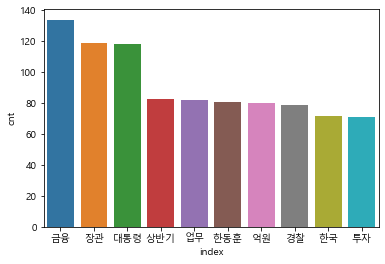

In [238]:
# 시각화
sns.barplot(x='index', y='cnt', data=df10, orient='v')

(-0.5, 1999.5, 1499.5, -0.5)

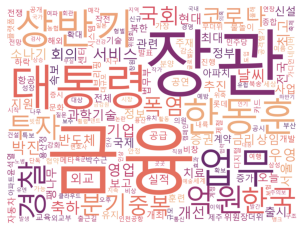

In [239]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=2000,height=1500).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

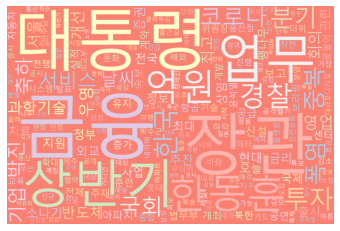

In [245]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')